In [59]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
stock = 'AMD'
data = yf.download(stock,'2010-01-01','2023-05-19')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,9.79,9.90,9.68,9.70,9.70,18748700
2010-01-05,9.71,9.90,9.68,9.71,9.71,22145700
2010-01-06,9.68,9.76,9.55,9.57,9.57,18643400
2010-01-07,9.51,9.55,9.18,9.47,9.47,26806800
2010-01-08,9.37,9.47,9.29,9.43,9.43,13752800


In [61]:
price = data['Close']
price

Date
2010-01-04      9.700000
2010-01-05      9.710000
2010-01-06      9.570000
2010-01-07      9.470000
2010-01-08      9.430000
                 ...    
2023-05-12     95.260002
2023-05-15     97.400002
2023-05-16    101.480003
2023-05-17    103.750000
2023-05-18    107.930000
Name: Close, Length: 3367, dtype: float64

<Axes: xlabel='Date'>

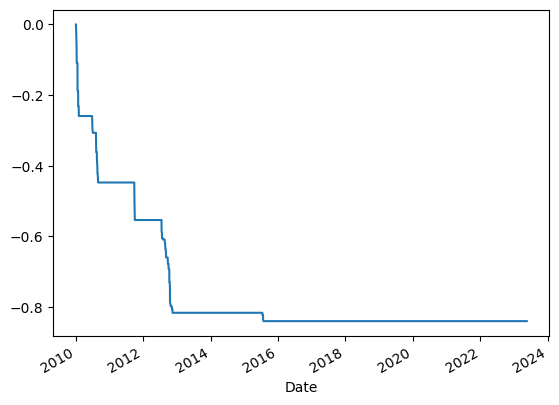

In [62]:
#Maximum Drawdown (MDD) calculation
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()

In [63]:
print(f"Maximum Drawdown for the given period is: {mdd[-1]*100} %")

Maximum Drawdown for the given period is: -84.05511782383532 %


In [64]:
#Cumulative returns
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns

array([ 0.        ,  0.00103095, -0.01441816, ...,  0.04188914,
        0.02236891,  0.04028916])

In [65]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([ 1.        ,  1.00103095,  0.98659793, ..., 10.46185622,
       10.6958765 , 11.12680437])

In [66]:
print(f"Cumulative return of stock is {cumulative_ret[-1]*100}%")

Cumulative return of stock is 1112.6804373963446%


In [67]:
# Sharpe ratio
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31   -0.339853
2012-12-31   -0.555556
2013-12-31    0.612500
2014-12-31   -0.310077
2015-12-31    0.074906
2016-12-31    2.951220
2017-12-31   -0.093474
2018-12-31    0.795720
2019-12-31    1.484291
2020-12-31    0.999782
2021-12-31    0.569076
2022-12-31   -0.549896
2023-12-31    0.666358
Freq: A-DEC, Name: Close, dtype: float64

In [68]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-01-31         NaN
2010-02-28    0.060322
2010-03-31    0.171934
2010-04-30   -0.021575
2010-05-31   -0.055127
                ...   
2023-01-31    0.160259
2023-02-28    0.045642
2023-03-31    0.247264
2023-04-30   -0.088154
2023-05-31    0.207676
Freq: M, Name: Close, Length: 161, dtype: float64

In [69]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is : {avg_yearly_return*100}%")

Average yearly return is : 48.49996854545922%


In [70]:
sharpe_ratio = (avg_yearly_return - 0.05)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : 26.95900140164161


In [71]:
# Sortino ratio
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-04-30   -0.021575
2010-05-31   -0.055127
2010-06-30   -0.145858
2010-08-31   -0.251001
2010-11-30   -0.006812
                ...   
2022-08-31   -0.101620
2022-09-30   -0.253446
2022-10-31   -0.052083
2022-12-31   -0.165658
2023-04-30   -0.088154
Name: Close, Length: 75, dtype: float64

In [72]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.05)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: 50.0984610833255
